In [1]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image
import seaborn as sns

In [ ]:
!unzip face_regions.zip

In [5]:
# Path
path = Path("face_regions")
fls = get_image_files(path)
failed = verify_images(path) # verify images
failed

'PosixPath' object is not iterable


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(#0) []

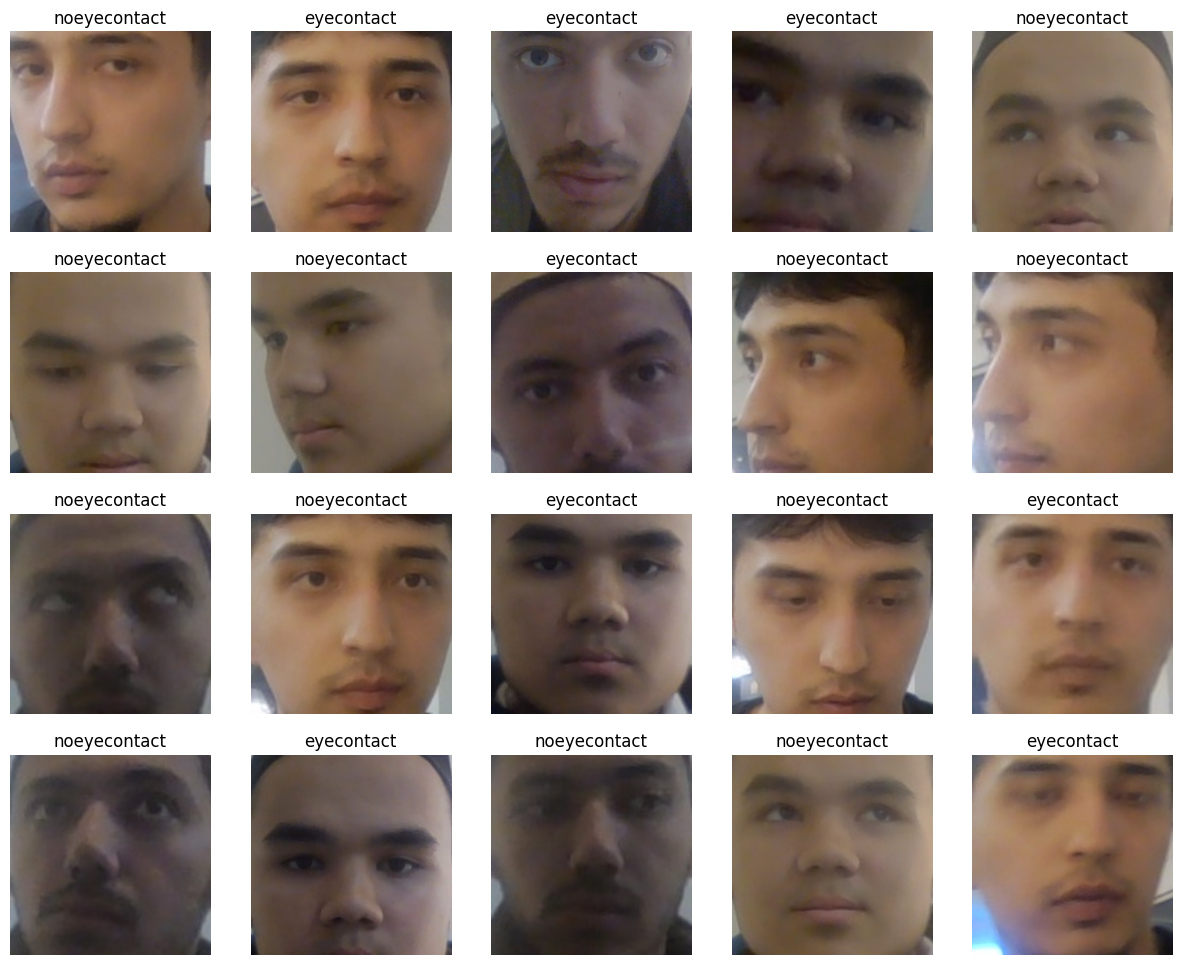

In [6]:
# Create DataBlock
eyes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=30),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Data loader
dls = eyes.dataloaders(path)

# check dataset
dls.train.show_batch(max_n=20, nrows=4)

In [7]:
# Learn & Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 166MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.555411,0.199193,0.926554,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.135021,0.025291,0.992467,00:12
1,0.078252,0.013448,0.994350,00:13
2,0.042804,0.015308,0.996234,00:13
3,0.023661,0.018607,0.996234,00:14
4,0.013852,0.014318,0.996234,00:15


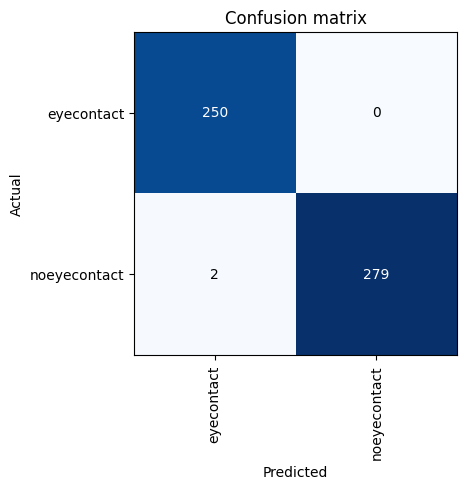

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


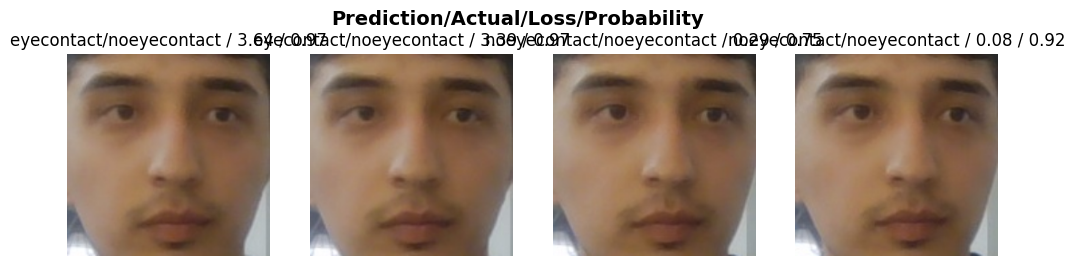

In [9]:
# Top Losses
interp.plot_top_losses(4, nrows=1)

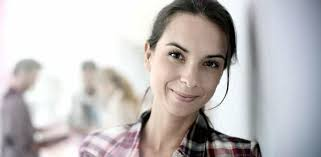

In [11]:
# Check the model manually
test1 = Image.open("/content/images (33).jpg")
test1

In [12]:
def predict_pic(img):
  pred, pred_id, probs = learn.predict(img)
  print(f"Prediction: {pred}")
  print(f"Probability: {probs[pred_id]*100:.1f}%")

predict_pic(test1)

Prediction: noeyecontact
Probability: 79.8%


In [13]:

# Saving model as pkl for deploying
torch.save(learn, 'eye_contact.pkl')